In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.shape

(2772, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [22]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


(array([468., 294., 224., 262., 210., 282., 294., 240., 266., 232.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

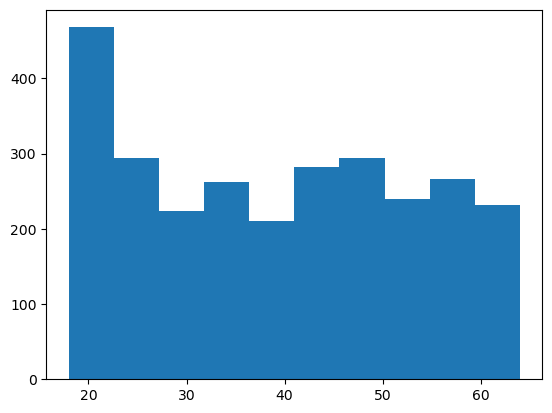

In [23]:
plt.hist(df['age'])

(array([ 62., 264., 486., 650., 596., 406., 202.,  70.,  30.,   6.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

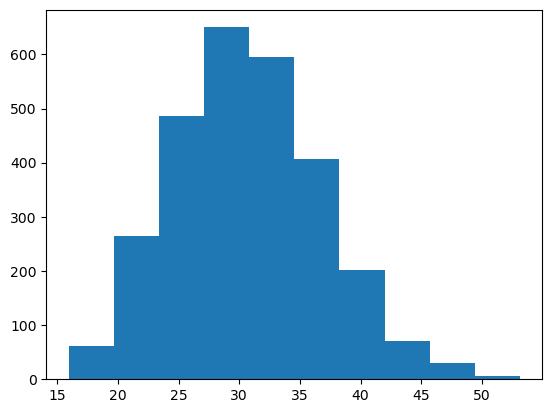

In [24]:
plt.hist(df['bmi'])

(array([1116.,  826.,  260.,  176.,   72.,  124.,  118.,   68.,    4.,
           8.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

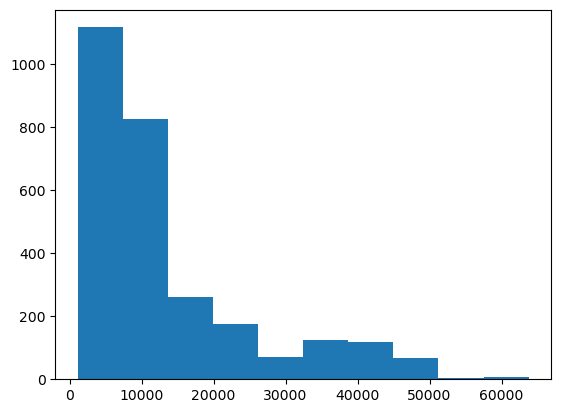

In [25]:
plt.hist(df['charges'])

In [26]:
df['sex'].value_counts()

male      1406
female    1366
Name: sex, dtype: int64

In [27]:
df['children'].value_counts()

0    1186
1     672
2     496
3     324
4      52
5      42
Name: children, dtype: int64

In [28]:
df['smoker'].value_counts()

no     2208
yes     564
Name: smoker, dtype: int64

In [29]:
df['region'].value_counts()

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64

In [30]:
index1 = df[df['charges'] > 50000].index
df.drop(index1,inplace = True)

index2 = df[df['bmi'] > 45].index
df.drop(index2,inplace = True)

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df.shape

(2716, 7)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [36]:
x = df.drop(columns = 'charges')
y = df['charges']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score

y_pred1 = lr.predict(x_test)
r2_score(y_test,y_pred1)

0.7342956333949097

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [42]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
y_pred2 = dt.predict(x_test)
r2_score(y_test,y_pred2)

0.9400496349567996

# SVM

In [92]:
from sklearn.svm import SVR

svm  = SVR(kernel = 'linear',C = 1000,gamma = 'scale',tol = 0.1,degree = 0)

In [93]:
svm.fit(x_train,y_train)

SVR(C=1000, degree=0, kernel='linear', tol=0.1)

In [94]:
y_pred3 = svm.predict(x_test)
r2_score(y_test,y_pred3)

0.6899402706405355

# KNN

In [133]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 1)

In [134]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [135]:
y_pred4 = knn.predict(x_test)
r2_score(y_test,y_pred4)

0.7366868272719747

# Voting Regressor

In [108]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators = [('lr',lr),('dt',dt),('knn',knn)])

In [109]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('knn', KNeighborsRegressor(n_neighbors=1))])

In [110]:
y_pred5 = vr.predict(x_test)
r2_score(y_test,y_pred5)

0.9027723351014673

# Bagging Regressor

In [139]:
from sklearn.ensemble import BaggingRegressor

bag1 = BaggingRegressor(base_estimator = knn,
                        n_estimators = 2000,
                        max_samples = 0.5,
                        bootstrap = True,
                       random_state = 42)

In [140]:
bag1.fit(x_train,y_train)

C:\Users\sansk\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=1),
                 max_samples=0.5, n_estimators=2000, random_state=42)

In [141]:
y_pred6 = bag1.predict(x_test)
r2_score(y_test,y_pred6)

0.5395035882937416

# Random Forest

In [149]:
from sklearn.ensemble import BaggingRegressor

bag2 = BaggingRegressor(base_estimator = dt,
                        n_estimators = 500,
                        max_samples = 0.5,
                        bootstrap = True,
                       random_state = 42)

In [150]:
bag2.fit(x_train,y_train)

C:\Users\sansk\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.5,
                 n_estimators=500, random_state=42)

In [151]:
y_pred7 = bag2.predict(x_test)
r2_score(y_test,y_pred7)

0.913629534486282

# AdaBoost

In [211]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 500,learning_rate = 0.01)

In [212]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=500)

In [213]:
y_pred8 = ada.predict(x_test)
r2_score(y_test,y_pred8)

0.8192497406899111

# Gradient Boosting

In [202]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators = 1000,learning_rate = 0.1)

In [203]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=1000)

In [204]:
y_pred9 = gb.predict(x_test)
r2_score(y_test,y_pred9)

0.9199256960268367

# XG Boost

In [226]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000,learning_rate = 0.1,tol = 0.01)

In [227]:
xgb.fit(x_train,y_train)

C:\Users\sansk\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:38] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "tol" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [228]:
y_pred10 = xgb.predict(x_test)
r2_score(y_test,y_pred10)

0.9554037921884431